In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO

df = pd.read_csv('rawdata.csv')

print(len(df))
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df.fillna(value={"Location": "Unknown"}, inplace=True)
df.head()

5239


,Title,Title_URL,View,View1,View2,View3,Location,View4,View5,View6,View7,pro,View9,con,View11,Rating,Date,Position,Status,helpfulness
0,Great place,https://www.glassdoor.com/Reviews/Employee-Rev...,5.0,"Nov 29, 2023",Anonymous Employee,"Current Employee, more than 1 year",Unknown,Recommend,CEO Approval,Business Outlook,Pros,Culture Benefits Employees Leadership Work lif...,Cons,"There are no cons, great place to work.",NaN,NaN,NaT,NaN,NaN,NaN
1,Great career-starting company,https://www.glassdoor.com/Reviews/Employee-Rev...,5.0,"Jun 11, 2018",QA Engineer,"Current Employee, more than 3 years","Smithfield, RI",Recommend,CEO Approval,Business Outlook,Pros,Benefits including profit sharing and bonuses ...,Cons,"In my current role, I am working overtime more...",226.0,NaN,NaT,NaN,NaN,NaN
2,No respect,https://www.glassdoor.com/Reviews/Employee-Rev...,1.0,"Nov 27, 2023",Regional Support Technician,"Current Employee, more than 5 years","Merrimack, NH",Recommend,CEO Approval,Business Outlook,Pros,The benefits are solid... Or so I'm told hones...,Cons,Despite the fact that the average employee of ...,3.0,NaN,NaT,NaN,NaN,NaN
3,Ehh...,https://www.glassdoor.com/Reviews/Employee-Rev...,2.0,"Nov 21, 2023",Financial Customer Associate,Current Employee,"Durham, NC",Recommend,CEO Approval,Business Outlook,Pros,The starting pay is pretty good for a call cen...,Cons,They claim that there are so many different op...,3.0,NaN,NaT,NaN,NaN,NaN
4,Let Go While 7 Months Pregnant,https://www.glassdoor.com/Reviews/Employee-Rev...,1.0,"Oct 16, 2023",Financial Consultant I,"Former Employee, more than 1 year","Chicago, IL",Recommend,CEO Approval,Business Outlook,Pros,I was drawn to the training program for the Fi...,Cons,I was in a 1 year training program for the Fin...,18.0,NaN,NaT,NaN,NaN,NaN


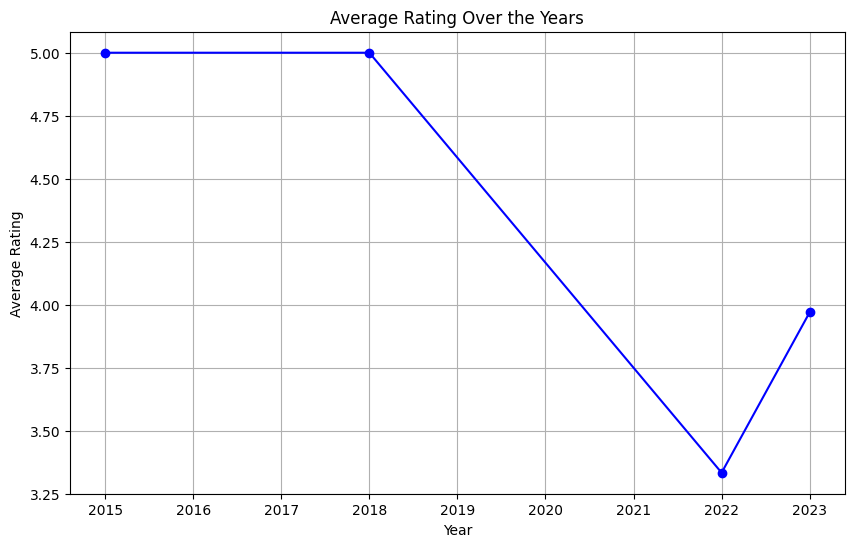

In [2]:
df['Year'] = df['Date'].dt.year
average_ratings_per_year = df.groupby('Year')['Rating'].mean()

average_ratings_per_year.plot(kind='line', marker='o', color='b', figsize=(10, 6))
plt.title('Average Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

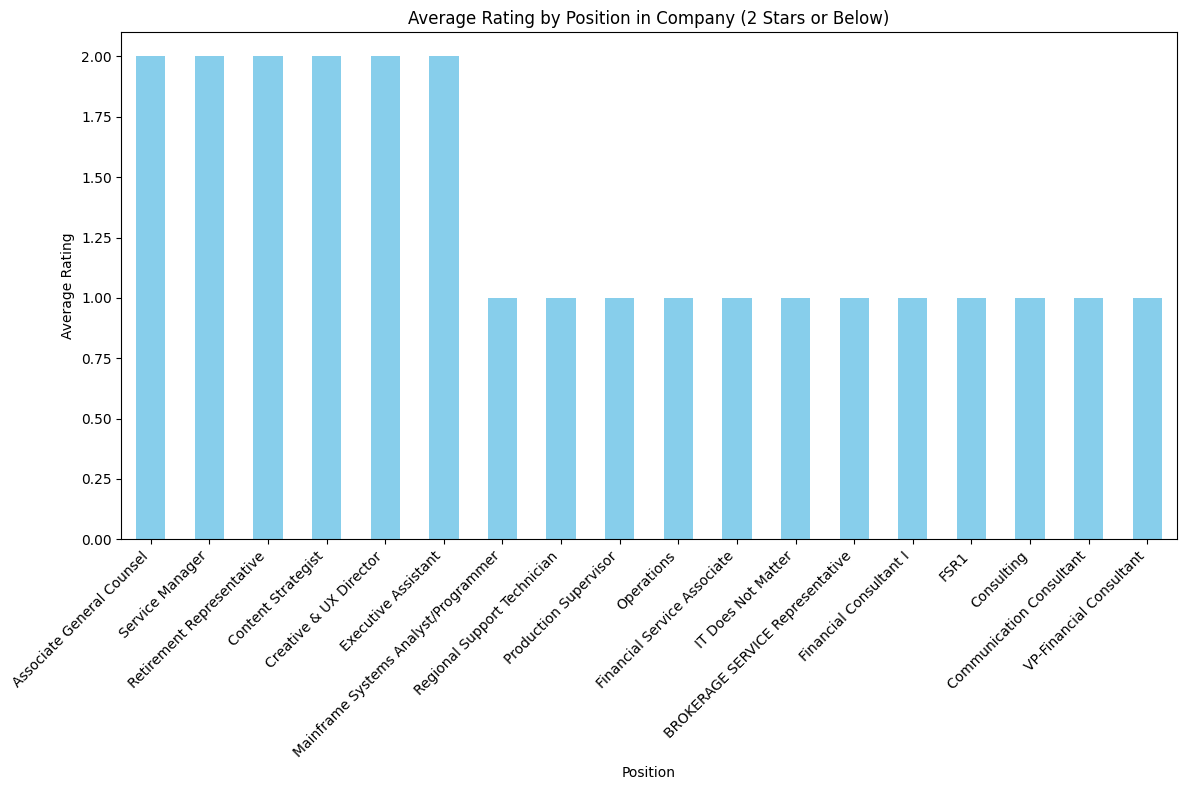

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Rating' to a numeric type
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Group by the 'Position' and calculate the average 'Rating'
average_ratings_by_position = df.groupby('Position')['Rating'].mean()

# Filter out positions with an average rating greater than 2
average_ratings_below_two = average_ratings_by_position[average_ratings_by_position <= 2].sort_values(ascending=False)

# Plotting the average ratings by position for ratings of 2 or below
plt.figure(figsize=(12, 8))
average_ratings_below_two.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Position in Company (2 Stars or Below)')
plt.xlabel('Position')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


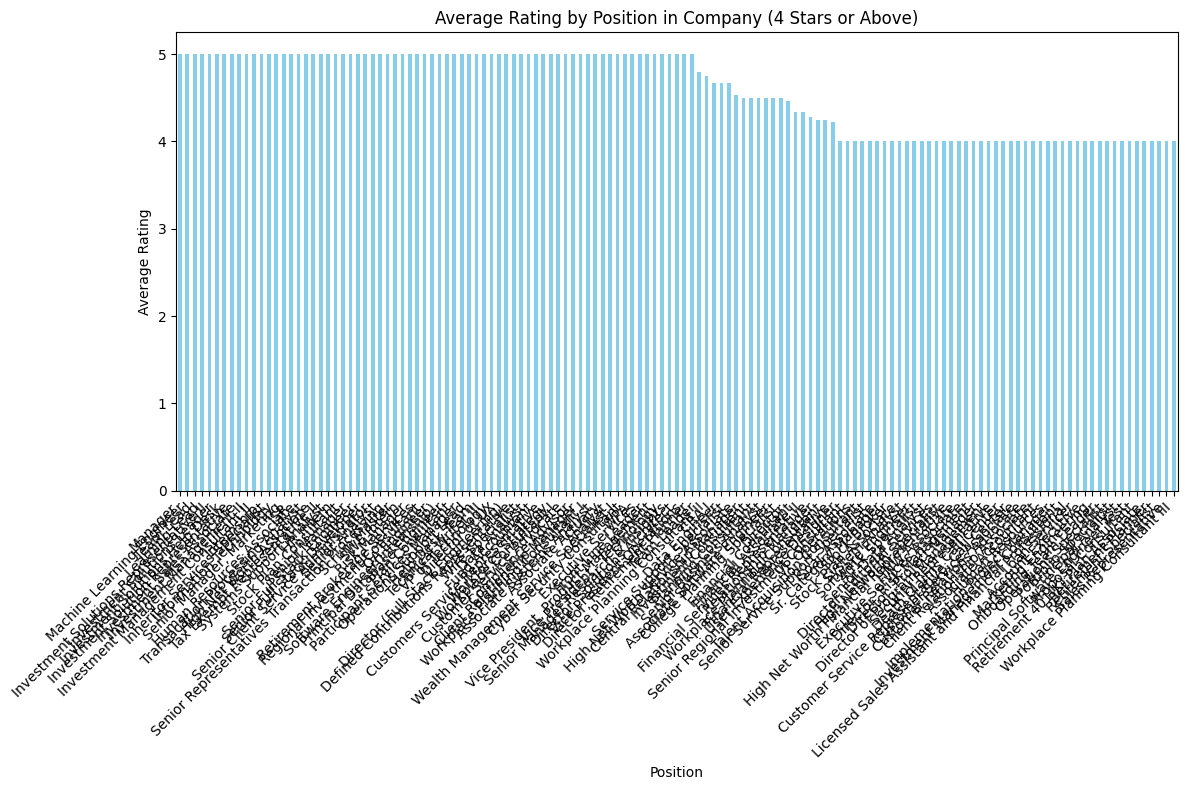

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert 'Rating' to a numeric type
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Group by the 'Position' and calculate the average 'Rating'
average_ratings_by_position = df.groupby('Position')['Rating'].mean()

# Filter out positions with an average rating less than 4
average_ratings_four_or_above = average_ratings_by_position[average_ratings_by_position >= 4].sort_values(ascending=False)

# Plotting the average ratings by position for ratings of 4 or above
plt.figure(figsize=(12, 8))
average_ratings_four_or_above.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Position in Company (4 Stars or Above)')
plt.xlabel('Position')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


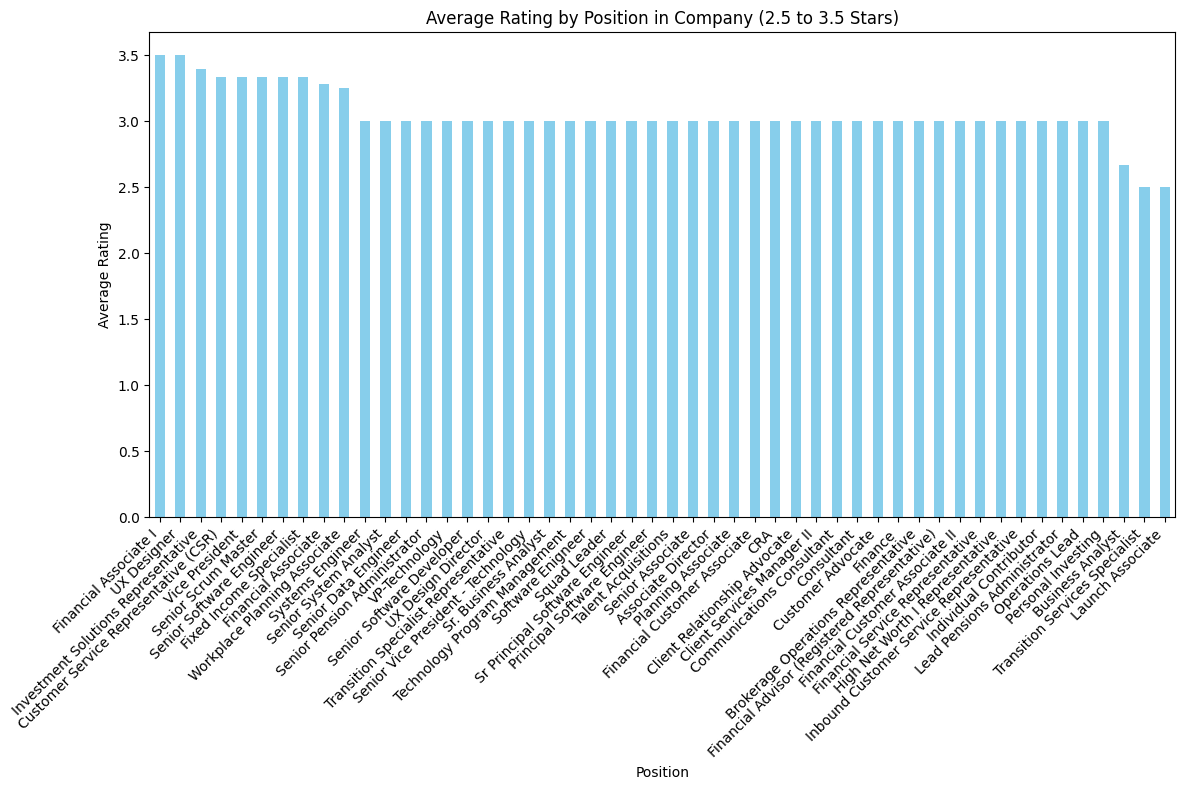

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

 
# Convert 'Rating' to a numeric type
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Group by the 'Position' and calculate the average 'Rating'
average_ratings_by_position = df.groupby('Position')['Rating'].mean()

# Filter out positions with an average rating between 2.5 and 3.5
average_ratings_between = average_ratings_by_position[(average_ratings_by_position >= 2.5) & (average_ratings_by_position <= 3.5)].sort_values(ascending=False)

# Plotting the average ratings by position for ratings between 2.5 and 3.5
plt.figure(figsize=(12, 8))
average_ratings_between.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Position in Company (2.5 to 3.5 Stars)')
plt.xlabel('Position')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


Position
Machine Learning Engineer              5.0
Senior Full Stack Developer            5.0
Scrum Master                           5.0
High Net Worth Associate               5.0
Help Desk Team                         5.0
HR Intern                              5.0
Fund Accountant                        5.0
Front Line Leader                      5.0
Senior Analyst                         5.0
Senior Client Service Administrator    5.0
Name: Rating, dtype: float64


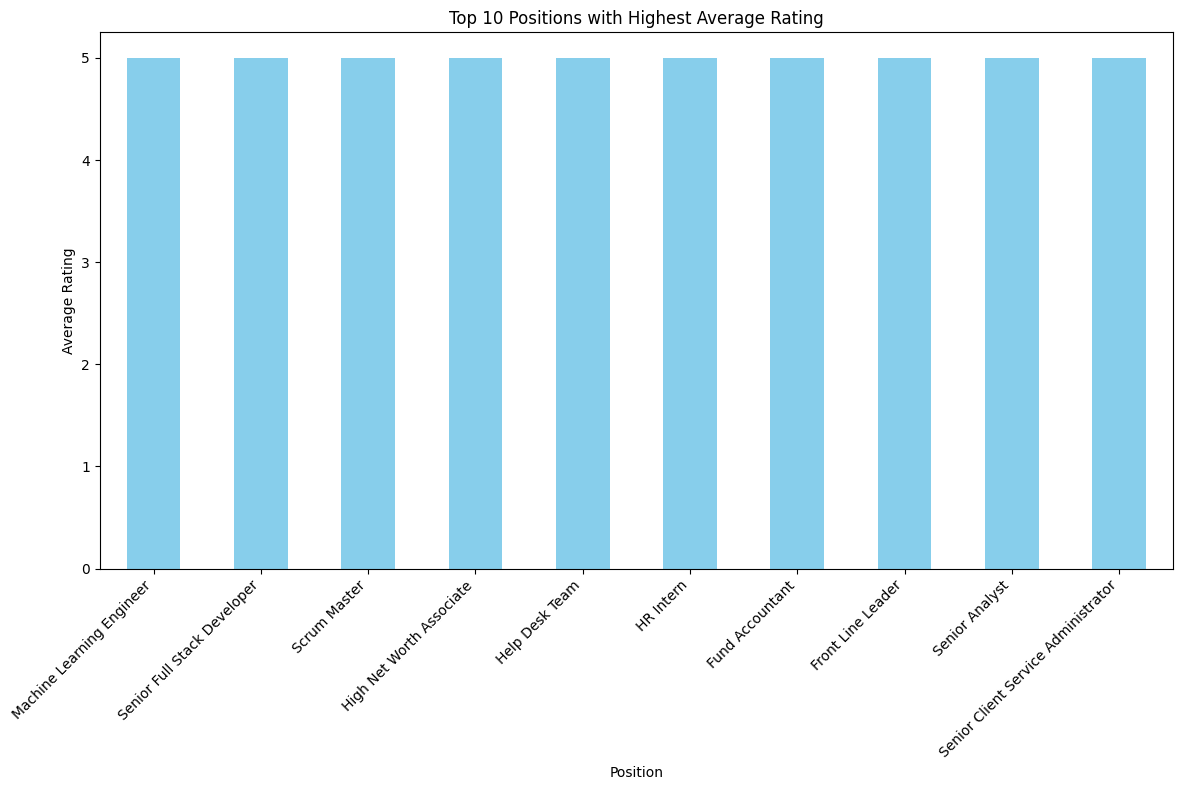

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

 
# Convert 'Rating' to a numeric type
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Group by the 'Position' and calculate the average 'Rating'
average_ratings_by_position = df.groupby('Position')['Rating'].mean()


top_positions = average_ratings_by_position.round(10).sort_values(ascending=False).head(10)
print(top_positions)


plt.figure(figsize=(12, 8))
top_positions.plot(kind='bar', color='skyblue')
plt.title('Top 10 Positions with Highest Average Rating')
plt.xlabel('Position')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


In [7]:
def categorize_position(position):
    position_lower = str(position).lower()
    if any(keyword in position_lower for keyword in ['consultant', 'advisor', 'planner', 'strategist', 'planning']):
        return 'Consultant/Advisor/Planner'
    elif any(keyword in position_lower for keyword in ['associate', 'specialist', 'executive', 'admin', 'assistant', 'secretary', 'clerk', 'coordinator', 'producer']):
        return 'Associate/Specialist/Executive/Admin'
    elif any(keyword in position_lower for keyword in ['analyst', 'programmer', 'engineer', 'developer', 'it', 'technology', 'software', 'data', 'modeler', 'scientist']):
        return 'Tech & Engineering/Data Science'
    elif any(keyword in position_lower for keyword in ['customer service', 'help desk', 'support', 'service', 'call center', 'agent']):
        return 'Customer Service/Support'
    elif any(keyword in position_lower for keyword in ['representative', 'advocate', 'broker', 'sales', 'marketing', 'business development']):
        return 'Sales/Marketing/Representation'
    elif any(keyword in position_lower for keyword in ['manager', 'supervisor', 'director', 'leader', 'lead', 'head', 'president', 'vp', 'vice president', 'chief']):
        return 'Management/Leadership'
    elif 'financial' in position_lower or 'finance' in position_lower or 'accounting' in position_lower or 'investment' in position_lower or 'banking' in position_lower:
        return 'Financial Services/Accounting/Banking'
    elif 'human resources' in position_lower or 'hr' in position_lower:
        return 'Human Resources'
    elif 'operations' in position_lower or 'logistics' in position_lower or 'procurement' in position_lower:
        return 'Operations/Logistics'
    elif 'design' in position_lower or 'ux' in position_lower or 'ui' in position_lower or 'graphic' in position_lower:
        return 'Design/UI/UX'
    elif 'intern' in position_lower or 'internship' in position_lower or 'graduate student' in position_lower:
        return 'Internship/Graduate'
    elif 'compliance' in position_lower or 'legal' in position_lower or 'law' in position_lower or 'regulatory' in position_lower:
        return 'Compliance/Legal'
    elif 'education' in position_lower or 'teacher' in position_lower or 'instructor' in position_lower or 'educator' in position_lower:
        return 'Education/Teaching'
    elif 'research' in position_lower:
        return 'Research'
    elif 'client' in position_lower or 'customer' in position_lower:
        return 'Client/Customer Management'
    elif 'trader' in position_lower or 'trading' in position_lower:
        return 'Trading'
    elif 'content' in position_lower:
        return 'Content Development'
    elif 'quality' in position_lower or 'qa' in position_lower or 'quality assurance' in position_lower:
        return 'Quality Assurance'
    elif 'project' in position_lower or 'program' in position_lower:
        return 'Project/Program Management'
    elif 'risk' in position_lower:
        return 'Risk Management'
    else:
        words = position_lower.split()
        return ' '.join(words[-4:]) if len(words) >= 4 else ' '.join(words)

# Apply the function to create a new column
df['general_position'] = df['Position'].apply(categorize_position)

# Display the DataFrame to verify the new column
print(df['general_position'].unique())


['nan' 'anonymous employee' 'Tech & Engineering/Data Science'
 'Customer Service/Support' 'Associate/Specialist/Executive/Admin'
 'Consultant/Advisor/Planner' 'Sales/Marketing/Representation'
 'Management/Leadership' 'Design/UI/UX'
 'Financial Services/Accounting/Banking' 'cra' 'senior scrum master'
 'Internship/Graduate' 'cra i' 'isr' 'wpa' 'consulting' 'fsr1'
 'personal investing' 'scrum master' 'Operations/Logistics'
 'fund accountant' 'Human Resources' 'workforce strategy'
 'individual contributor']


general_position
wpa                                      5.000000
workforce strategy                       5.000000
scrum master                             5.000000
Internship/Graduate                      5.000000
isr                                      5.000000
fund accountant                          5.000000
cra i                                    4.666667
Human Resources                          4.500000
Management/Leadership                    4.250000
Consultant/Advisor/Planner               4.188406
Financial Services/Accounting/Banking    4.000000
Associate/Specialist/Executive/Admin     3.896907
Tech & Engineering/Data Science          3.887097
Sales/Marketing/Representation           3.823529
anonymous employee                       3.812500
Customer Service/Support                 3.763158
Design/UI/UX                             3.666667
senior scrum master                      3.333333
cra                                      3.000000
individual contributor           

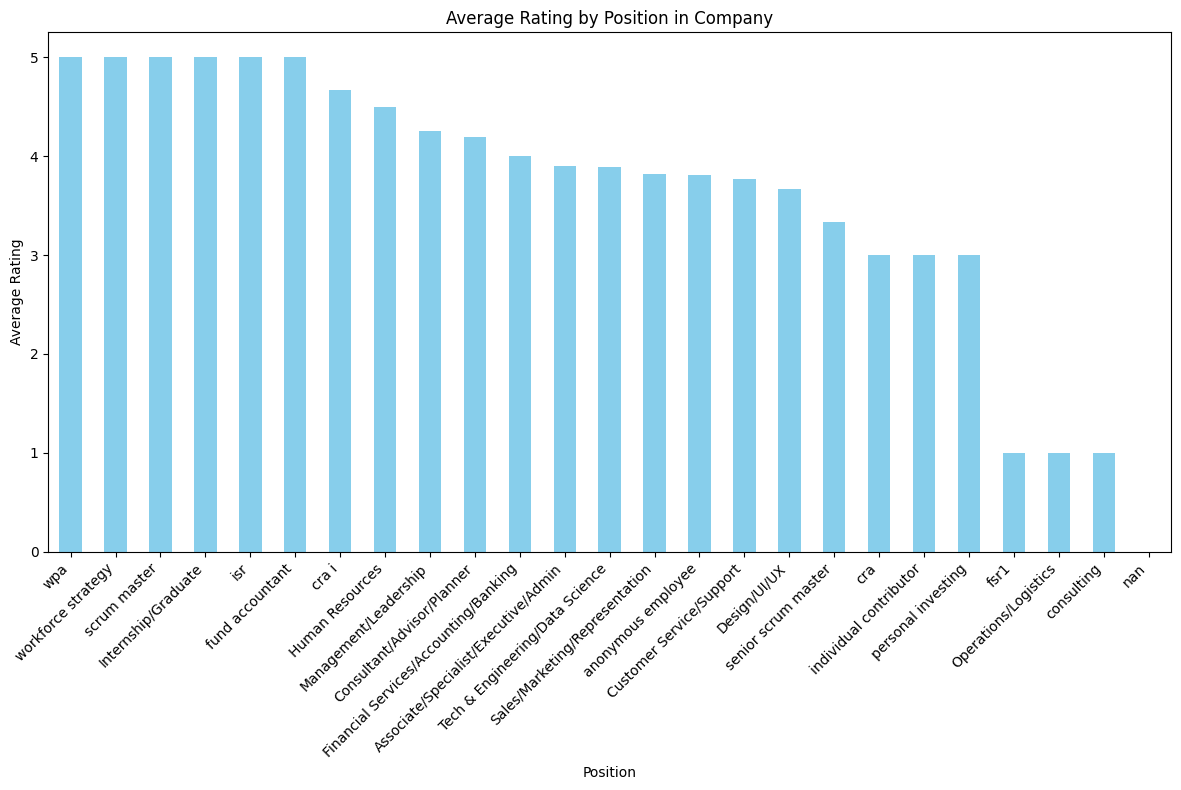

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

 
# Convert 'Rating' to a numeric type
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Group by the 'Position' and calculate the average 'Rating'
average_ratings_by_position = df.groupby('general_position')['Rating'].mean()


top_positions = average_ratings_by_position.round(10).sort_values(ascending=False)
print(top_positions)


plt.figure(figsize=(12, 8))
top_positions.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Position in Company')
plt.xlabel('Position')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


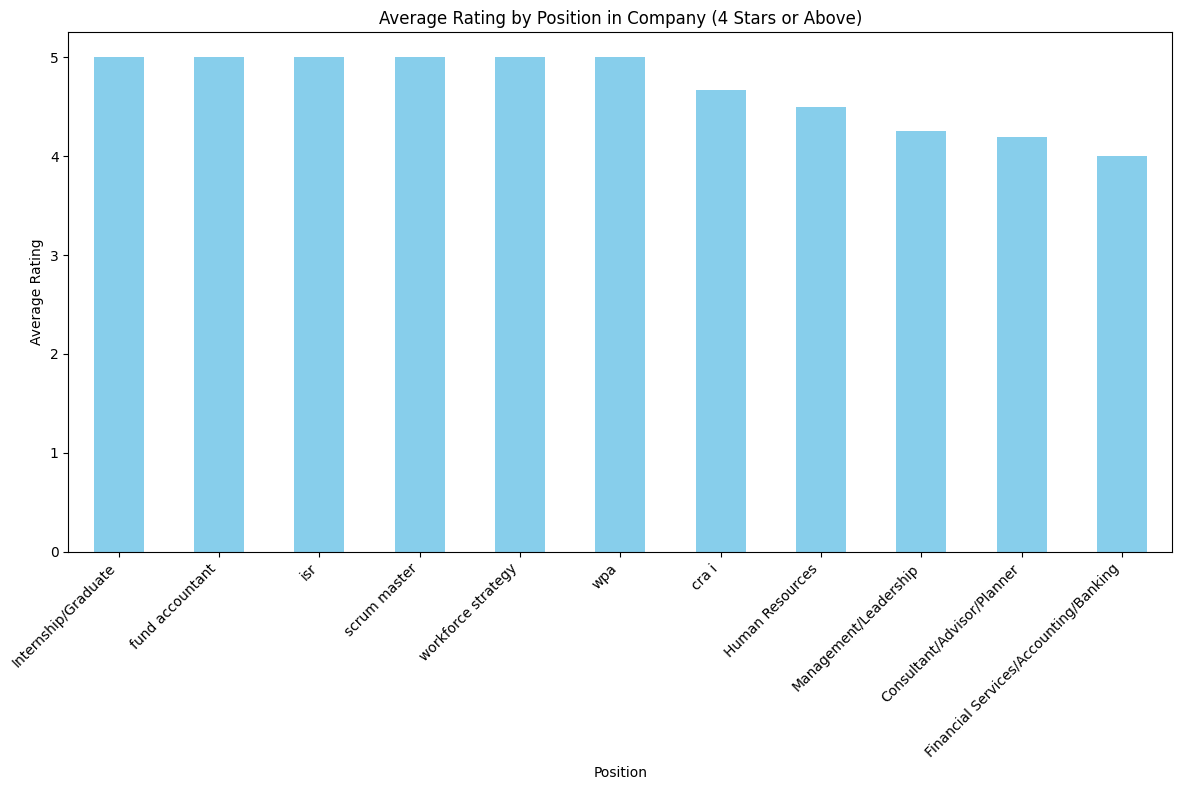

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

 
# Convert 'Rating' to a numeric type
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Group by the 'Position' and calculate the average 'Rating'
average_ratings_by_position = df.groupby('general_position')['Rating'].mean()

# Filter out positions with an average rating less than 4
average_ratings_four_or_above = average_ratings_by_position[average_ratings_by_position >= 4].sort_values(ascending=False)

# Plotting the average ratings by position for ratings of 4 or above
plt.figure(figsize=(12, 8))
average_ratings_four_or_above.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Position in Company (4 Stars or Above)')
plt.xlabel('Position')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


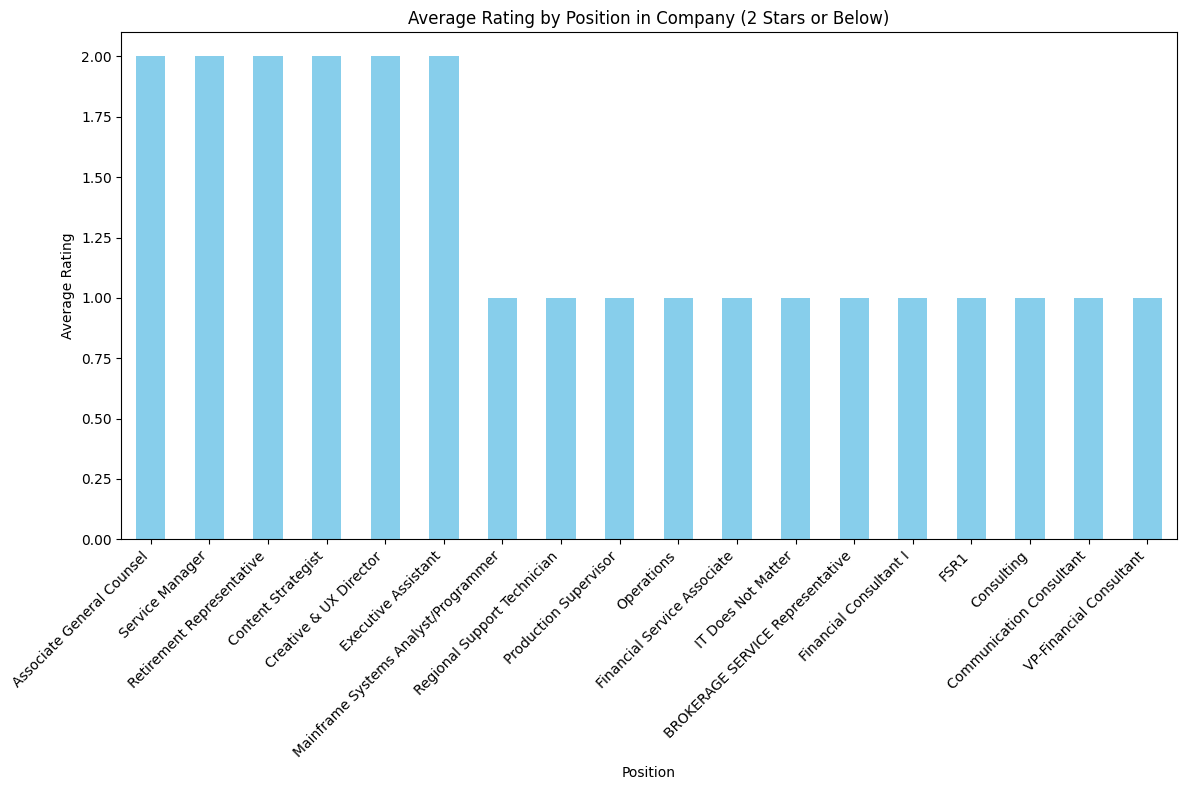

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

 
# Convert 'Rating' to a numeric type
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Group by the 'Position' and calculate the average 'Rating'
average_ratings_by_position = df.groupby('Position')['Rating'].mean()

# Filter out positions with an average rating greater than 2
average_ratings_below_two = average_ratings_by_position[average_ratings_by_position <= 2].sort_values(ascending=False)

# Plotting the average ratings by position for ratings of 2 or below
plt.figure(figsize=(12, 8))
average_ratings_below_two.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Position in Company (2 Stars or Below)')
plt.xlabel('Position')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


Location
Minneapolis, MN                    5.0
Detroit, MI                        5.0
Providence, RI                     5.0
Newark, NJ                         5.0
Nashua, NH                         5.0
                                  ... 
Provo, UT                          2.0
Greenwood Village, Arapahoe, CO    2.0
Lone Tree, CO                      1.0
Greenwood Village, CO              1.0
Fort Lauderdale, FL                1.0
Name: Rating, Length: 70, dtype: float64


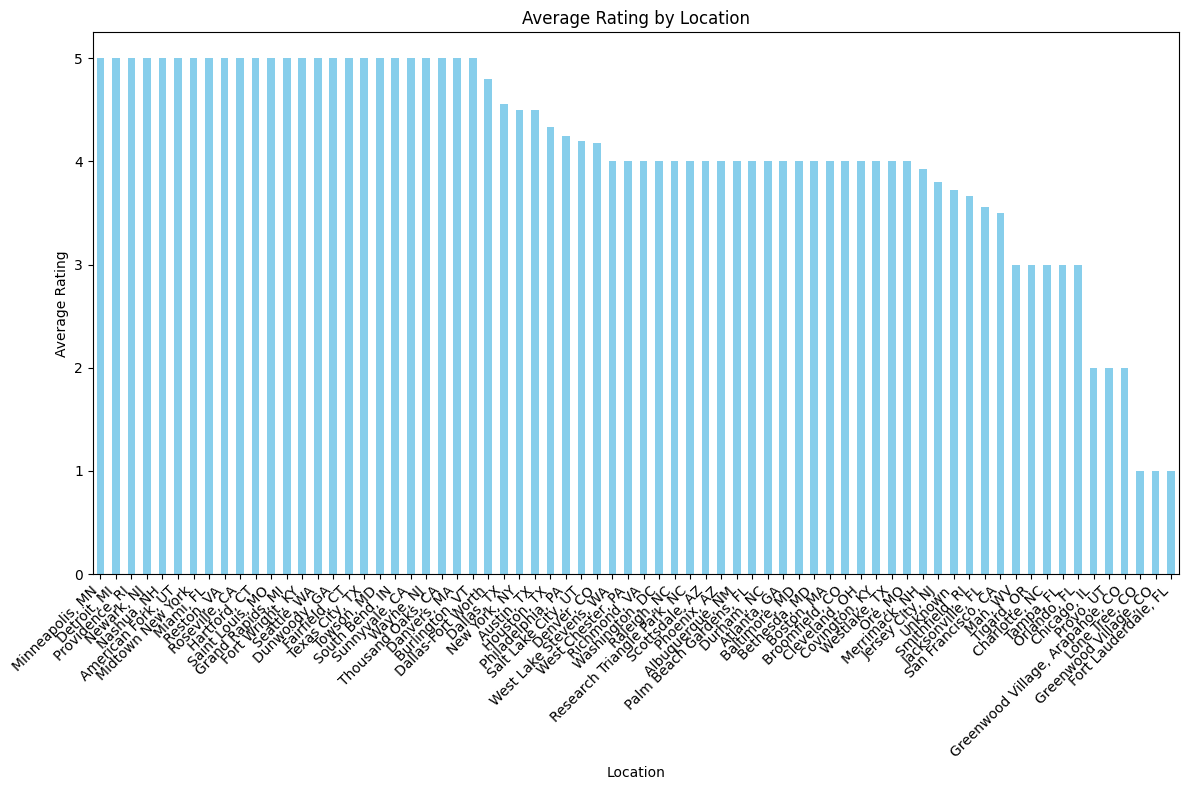

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

 
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Group by 'Location' and calculate the average 'Rating'
average_ratings_by_location = df.groupby('Location')['Rating'].mean()

# Filter out locations with NaN or 0 ratings
average_ratings_by_location_filtered = average_ratings_by_location[average_ratings_by_location > 0]

# Sort the results
average_ratings_by_location_sorted = average_ratings_by_location_filtered.sort_values(ascending=False)

# Display the average ratings by location
print(average_ratings_by_location_sorted)

# Plotting the data
plt.figure(figsize=(12, 8))
average_ratings_by_location_sorted.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Location')
plt.xlabel('Location')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


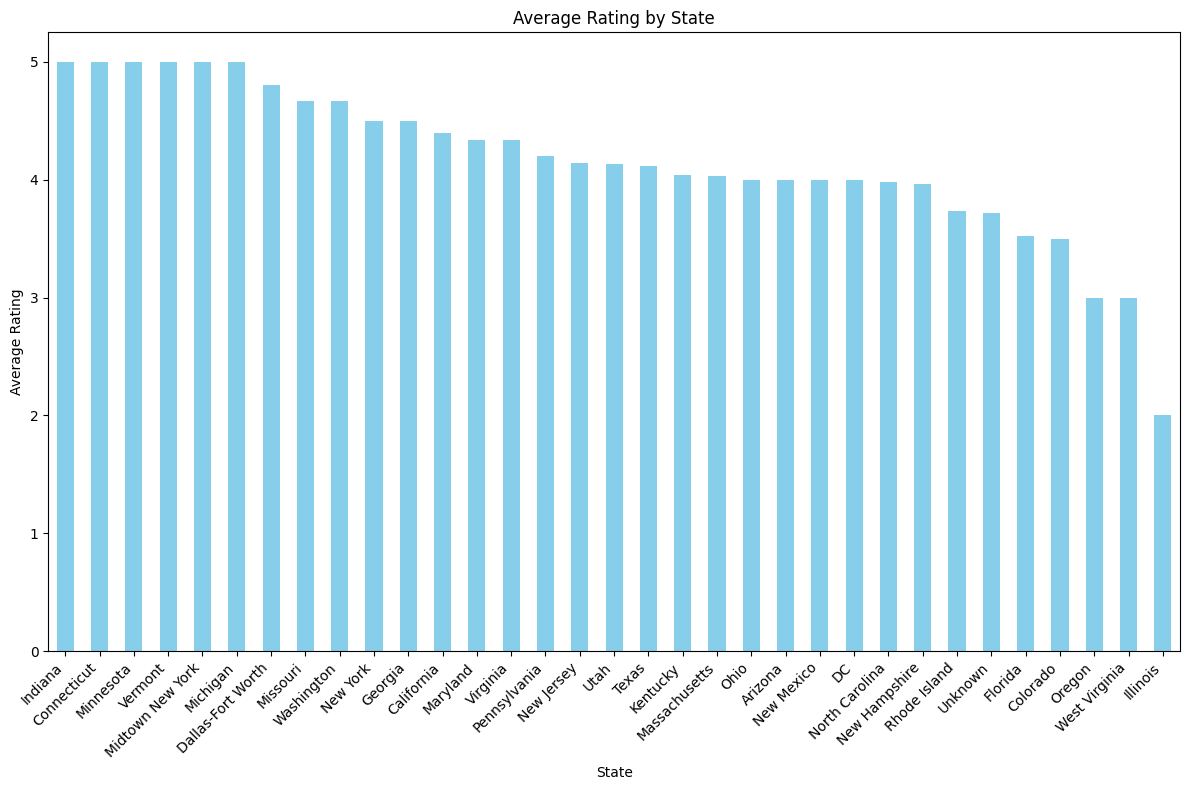

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

 
 
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Function to extract state initials
def extract_state(location):
    parts = location.split(', ')
    return parts[-1] if len(parts) > 1 else location

# Extract state initials to a new column
df['location_state'] = df['Location'].apply(extract_state)

# Mapping of state initials to full names
state_mapping = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Replace state initials with full names, retain original if no mapping found
df['location_state'] = df['location_state'].apply(lambda x: state_mapping.get(x, x))

# Group by the new 'location_state' and calculate the average 'Rating'

average_ratings_by_location_state = df.groupby('location_state')['Rating'].mean().sort_values(ascending=False)
average_ratings_by_location_state = average_ratings_by_location_state[average_ratings_by_location_state > 0]

# Optionally, plot this data
plt.figure(figsize=(12, 8))
average_ratings_by_location_state.plot(kind='bar', color='skyblue')
plt.title('Average Rating by State')
plt.xlabel('State')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top 10 Highest Average Ratings by Location:
Location
Minneapolis, MN      5.0
Detroit, MI          5.0
Providence, RI       5.0
Newark, NJ           5.0
Nashua, NH           5.0
American Fork, UT    5.0
Midtown New York     5.0
Miami, FL            5.0
Reston, VA           5.0
Roseville, CA        5.0
Name: Rating, dtype: float64

Top 10 Lowest Average Ratings by Location:
Location
Tigard, OR                         3.0
Charlotte, NC                      3.0
Tampa, FL                          3.0
Orlando, FL                        3.0
Chicago, IL                        2.0
Provo, UT                          2.0
Greenwood Village, Arapahoe, CO    2.0
Lone Tree, CO                      1.0
Greenwood Village, CO              1.0
Fort Lauderdale, FL                1.0
Name: Rating, dtype: float64


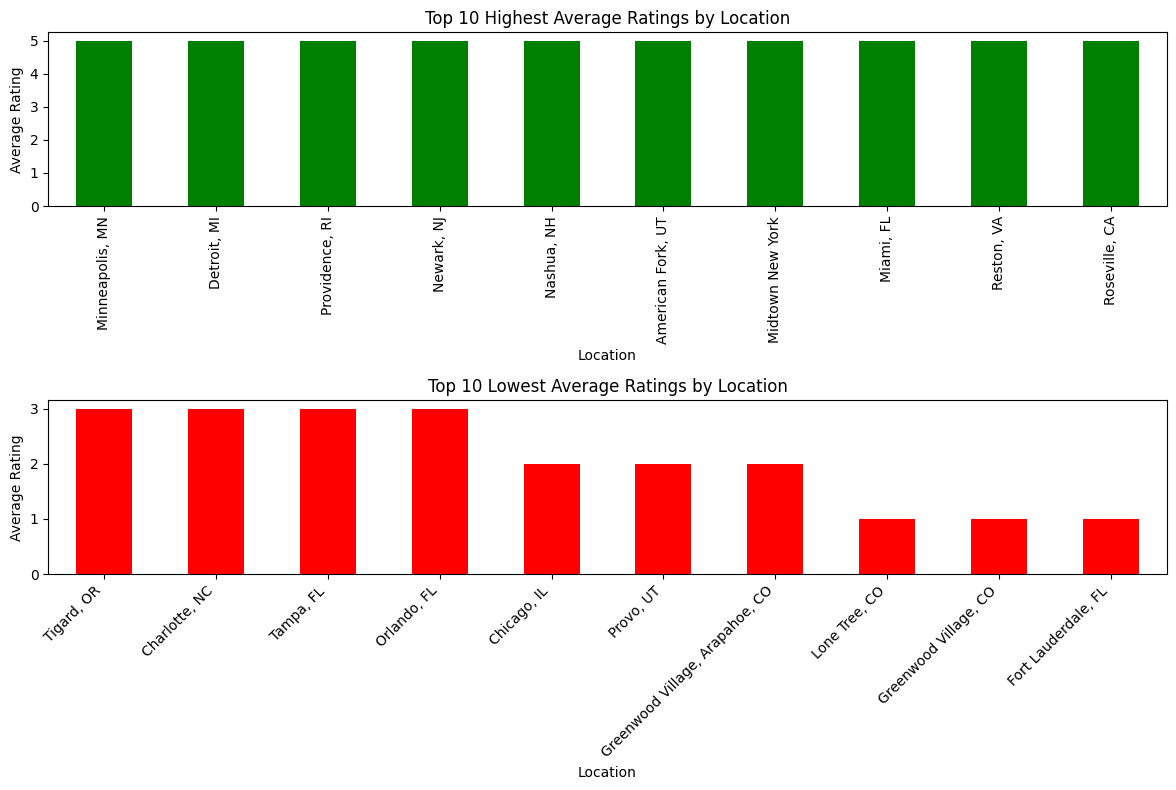

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


 
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Group by 'Location' and calculate the average 'Rating'
average_ratings_by_location = df.groupby('Location')['Rating'].mean()

# Sort the average ratings
average_ratings_by_location_sorted = average_ratings_by_location.sort_values(ascending=False)
average_ratings_by_location_sorted = average_ratings_by_location_sorted[average_ratings_by_location_sorted > 0]

# Get the top 10 highest average ratings
top_10_highest = average_ratings_by_location_sorted.head(10)
print("Top 10 Highest Average Ratings by Location:")
print(top_10_highest)

# Get the top 10 lowest average ratings
top_10_lowest = average_ratings_by_location_sorted.tail(10)
print("\nTop 10 Lowest Average Ratings by Location:")
print(top_10_lowest)

# Plotting for visualization
plt.figure(figsize=(12, 8))

# Plot for top 10 highest average ratings
plt.subplot(2, 1, 1)
top_10_highest.plot(kind='bar', color='green')
plt.title('Top 10 Highest Average Ratings by Location')
plt.ylabel('Average Rating')

# Plot for top 10 lowest average ratings
plt.subplot(2, 1, 2)
top_10_lowest.plot(kind='bar', color='red')
plt.title('Top 10 Lowest Average Ratings by Location')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import bigrams, trigrams
from collections import Counter

  
nltk.download('punkt')
nltk.download('stopwords')

   
# Convert 'Title' to string type
df['Title'] = df['Title'].astype(str)

# Function to calculate word frequency for bigrams and trigrams, excluding custom words
def word_frequency_phrases(text):
    custom_stop_words = {'company', 'work', 'place', 'poor', 'good', 'excellent', 'great', 
                         'fantastic', 'superb', 'average', 'mediocre', 'amazing', 'low', 'overall', 'best'}
    stop_words = set(stopwords.words('english')).union(custom_stop_words)
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    
    # Generate bigrams and trigrams
    bigrm = list(bigrams(words))
    trigrm = list(trigrams(words))
    
    # Combine bigrams and trigrams
    phrases = [' '.join(bg) for bg in bigrm] + [' '.join(tg) for tg in trigrm]
    return Counter(phrases)

# Group by 'Rating' and calculate most common phrases for each 'Title'
grouped = df.groupby('Rating')['Title'].apply(lambda x: ' '.join(x))
most_common_phrases = grouped.apply(lambda x: word_frequency_phrases(x).most_common(5))

# Display the result in a table
print("Most Popular Phrases in 'Title' for Each Rating:")
print(most_common_phrases)

# For a printed format
for rating, phrases in most_common_phrases.items():
    print(f"\nRating: {rating}")
    for phrase, freq in phrases:
        print(f"{phrase}: {freq}")


Most Popular Phrases in 'Title' for Each Rating:
Rating
1.0    [(mental health, 3), (value mental, 2), (value...
2.0    [(toxic toxic, 2), (ehh fidelity, 1), (fidelit...
3.0    [(care employees, 2), (culture underpay, 1), (...
4.0    [(call center, 3), (career start, 2), (first j...
5.0    [(culture benefits, 5), (fidelity investments,...
Name: Title, dtype: object

Rating: 1.0
mental health: 3
value mental: 2
value mental health: 2
respect let: 1
let go: 1

Rating: 2.0
toxic toxic: 2
ehh fidelity: 1
fidelity ea: 1
ea seem: 1
seem unwilling: 1

Rating: 3.0
care employees: 2
culture underpay: 1
underpay care: 1
employees non: 1
non existent: 1

Rating: 4.0
call center: 3
career start: 2
first job: 2
benefits decent: 2
mixed feelings: 2

Rating: 5.0
culture benefits: 5
fidelity investments: 3
benefits culture: 2
highly recommend: 2
investments benefits: 2


[nltk_data] Downloading package punkt to /Users/jeet/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jeet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

  
nltk.download('punkt')
nltk.download('stopwords')

   
# Function to calculate word frequency, excluding custom and standard stopwords
def word_frequency(text):
    custom_stop_words = {
        'company', 'work', 'place', 'poor', 'good', 'excellent', 'great',
        'fantastic', 'superb', 'average', 'mediocre', 'best', 'worst',
        'better', 'bad', 'terrible', 'awful', 'amazing', 'horrible',
        'like', 'dislike', 'get', 'cons', 'call', 'calls'
    }
    stop_words = set(stopwords.words('english')).union(custom_stop_words)
    words = word_tokenize(text.lower())
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    return Counter(filtered_words)

# Group by 'Rating' and calculate most common words for 'pro' and 'con'
grouped_pro = df.groupby('Rating')['pro'].apply(lambda x: ' '.join(x.astype(str)))
grouped_con = df.groupby('Rating')['con'].apply(lambda x: ' '.join(x.astype(str)))

most_common_words_pro = grouped_pro.apply(lambda x: word_frequency(x).most_common(5))
most_common_words_con = grouped_con.apply(lambda x: word_frequency(x).most_common(5))

# Display the result in a table
print("Most Popular Words in 'pro' for Each Rating:")
print(most_common_words_pro)
print("\nMost Popular Words in 'con' for Each Rating:")
print(most_common_words_con)

# For a printed format
print("\nMost Popular Words in 'pro':")
for rating, words in most_common_words_pro.items():
    print(f"\nRating: {rating}")
    for word, freq in words:
        print(f"{word}: {freq}")

print("\nMost Popular Words in 'con':")
for rating, words in most_common_words_con.items():
    print(f"\nRating: {rating}")
    for word, freq in words:
        print(f"{word}: {freq}")


[nltk_data] Downloading package punkt to /Users/jeet/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jeet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most Popular Words in 'pro' for Each Rating:
Rating
1.0    [(benefits, 10), (training, 4), (pay, 4), (cul...
2.0    [(benefits, 16), (pay, 6), (training, 5), (peo...
3.0    [(benefits, 41), (pay, 15), (people, 15), (nic...
4.0    [(benefits, 54), (people, 23), (fidelity, 22),...
5.0    [(benefits, 103), (fidelity, 43), (career, 41)...
Name: pro, dtype: object

Most Popular Words in 'con' for Each Rating:
Rating
1.0    [(fidelity, 16), (job, 11), (people, 11), (pay...
2.0    [(even, 12), (working, 10), (time, 10), (peopl...
3.0    [(management, 27), (people, 18), (office, 16),...
4.0    [(time, 23), (pay, 19), (role, 18), (office, 1...
5.0    [(pay, 42), (time, 20), (fidelity, 19), (base,...
Name: con, dtype: object

Most Popular Words in 'pro':

Rating: 1.0
benefits: 10
training: 4
pay: 4
culture: 4
job: 3

Rating: 2.0
benefits: 16
pay: 6
training: 5
people: 4
nice: 4

Rating: 3.0
benefits: 41
pay: 15
people: 15
nice: 10
training: 10

Rating: 4.0
benefits: 54
people: 23
fidelity: 22
cu

In [16]:
import pandas as pd

# Assuming your DataFrame is named df and it has columns 'Rating' and 'helpfulness'
# Make sure 'helpfulness' is a numeric column
df['helpfulness'] = pd.to_numeric(df['helpfulness'], errors='coerce')

# Group by 'Rating' and calculate the average 'helpfulness'
average_helpfulness_by_rating = df.groupby('Rating')['helpfulness'].mean()

# Display the result
print("Average Helpfulness for Each Rating:")
print(average_helpfulness_by_rating)


Average Helpfulness for Each Rating:
Rating
1.0     5.733333
2.0     3.185185
3.0     3.126984
4.0     1.941176
5.0    12.205128
Name: helpfulness, dtype: float64


In [17]:
import pandas as pd

# Assuming your DataFrame is named df and it has columns 'Status' and 'Rating'
# Make sure 'Rating' is a numeric column
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Group by 'Status' and calculate the average 'Rating'
average_rating_by_status = df.groupby('Status')['Rating'].mean()

# Display the result
print("Average Rating for Each Status:")
print(average_rating_by_status)


Average Rating for Each Status:
Status
Current Employee                        4.100000
Current Employee, less than 1 year      4.200000
Current Employee, more than 1 year      4.091954
Current Employee, more than 10 years    4.000000
Current Employee, more than 3 years     4.411765
Current Employee, more than 5 years     3.833333
Current Employee, more than 8 years     3.900000
Former Employee                         3.583333
Former Employee, less than 1 year       3.740741
Former Employee, more than 1 year       3.282051
Former Employee, more than 10 years     3.142857
Former Employee, more than 3 years      3.722222
Former Employee, more than 5 years      4.000000
Former Employee, more than 8 years      3.833333
Name: Rating, dtype: float64


In [18]:
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Assuming your data is loaded into a DataFrame called df
# Convert 'Rating' to a numeric type and filter rows with rating 3 or below
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
filtered_df = df[df['Rating'] <= 3]

# Convert 'con' to string type
filtered_df['con'] = filtered_df['con'].astype(str)

# Extend the stopwords list with your custom words
custom_stop_words = {'like', 'even', 'people', 'get', 'fidelity'}
stop_words = set(stopwords.words('english')).union(custom_stop_words)

def word_frequency(text_column):
    words = word_tokenize(' '.join(text_column).lower())
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    return Counter(filtered_words)

# Counting word frequency in 'con'
con_freq = word_frequency(filtered_df['con'])

# Displaying the most common words in 'con' for ratings 3 or below, excluding custom stop words
print("Most common words in 'con' for ratings 3 or below (excluding certain words):")
for word, count in con_freq.most_common(10):
    print(f"{word}: {count}")


Most common words in 'con' for ratings 3 or below (excluding certain words):
work: 57
management: 40
company: 32
pay: 31
office: 28
role: 25
training: 24
time: 24
job: 23
call: 22


[nltk_data] Downloading package punkt to /Users/jeet/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jeet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/f6/tr_gxbkd2510_wbt4rl50ndh0000gn/T/ipykernel_41295/577463723.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['con'] = filtered_df['con'].astype(str)
